# Chapter 19 - Visualize Residual Forecast Errors

Forecast errors on time series regression problems are called residuals or residual errors. Careful exploration of residual errors on your time series prediction problem can tell you a lot about your forecast model and even suggest improvements.

After completing this tutorial, you will know:
- How to create and review line plots of residual errors over time.
- How to review summary statistics and plots of the distribution of residual plots.
- How to explore the correlation structure of residual errors.

## 19.1 Residual Forecast Errors
Forecast errors on a time series forecasting problem are called residual errors or residuals.
- residual error = expected - forecast

Or, more succinctly and using standard terms as:
-   e = y - yhat

We often stop there and summarize the skill of a model as a summary of this error. Instead, we can collect these individual residual errors across all forecasts and use them to better understand the forecast model.

## 19.2 Daily Female Births Dataset
This dataset describes the number of daily female births in California in 1959.

## 19.3 Persistence Forecast Model
The simplest forecast that we can make is to forecast that what happened in the previous time step will be the same as what will happen in the next time step. This is `called the naive forecast or the persistence forecast model`.

In [63]:
# calculate residuals from a persistence forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pylab import rcParams

csvfile = '.\\code\\chapter_19\\daily-total-female-births.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.shape)
series.head(5)

(365,)


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [64]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.head(5)

,t,t+1
0,NaN,35
1,35.0,32
2,32.0,30
3,30.0,31
4,31.0,44


In [65]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

# split by columns
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]  # 75% frp, test[:,0] column_1

# Calculate residuals errors
# are then calculated as the difference between the expected outcome and the prediction.
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


## 19.4 Residual Line Plot
The first plot is to look at the residual forecast errors over time as a line plot. We would expect the plot to be random around the value of 0 and not show any trend or cyclic structure.

## 19.5 Residual Summary Statistics

We can calculate summary statistics on the residual errors. Primarily, we are interested in the mean value of the residual errors. A value close to zero suggests no bias in the forecasts, whereas positive and negative values suggest a positive or negative bias in the forecasts made. It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior to their use or evaluation.

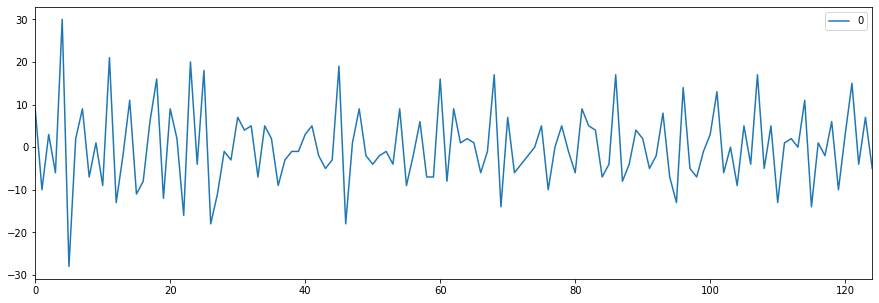

In [66]:
# plot residuals
rcParams['figure.figsize'] = 15, 5
residuals.plot()
pyplot.show()

In [67]:
# summary statistics
print(residuals.describe())

0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


Running the example shows a mean error value close to zero, but perhaps not close enough. It suggests that there may be some bias and that we may be able to further improve the model by performing a bias correction. This could be done by adding the mean residual error (0.064000) to forecasts. This may work in this case, but it is a naive form of bias correction and there are more sophisticated methods available.

## 19.6 Residual Histogram and Density Plots
Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean. Plots can help discover skews in this distribution. We can use both histograms and density plots to better understand the distribution of residual errors.

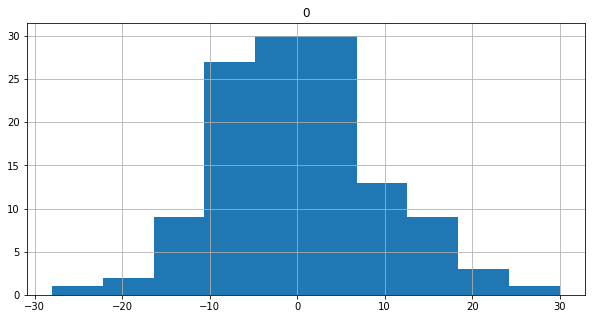

In [68]:
# histogram plot
rcParams['figure.figsize']= 10, 5
residuals.hist()
pyplot.show()

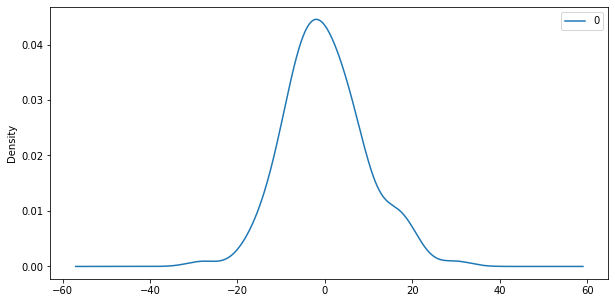

In [69]:
# density plot
rcParams['figure.figsize']= 10, 5
residuals.plot(kind='kde')
pyplot.show()

## 19.7 Residual Q-Q Plot
Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar or different they happen to be.
The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The values are ordered and compared to an idealized Gaussian distribution.

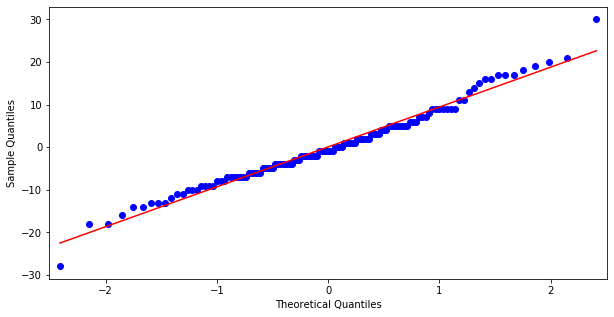

In [70]:
import numpy as np
from statsmodels.graphics.gofplots import qqplot

# calculate residuals
rcParams['figure.figsize']= 10, 5
residuals1 = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals1 = np.array(residuals1)
qqplot(residuals1, line='r')
pyplot.show()

## 19.8 Residual Autocorrelation Plot

Autocorrelation calculates the strength of the relationship between an observation and observations at prior time steps. We can calculate the autocorrelation of the residual error time series and plot the results. This is `called an autocorrelation plot`.

A signicant autocorrelation in the residual plot suggests that the model could be doing a better job of incorporating the relationship between observations and lagged observations, called autoregression.

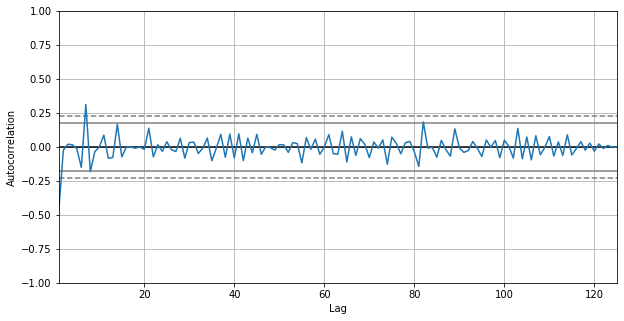

In [71]:
from pandas.plotting import autocorrelation_plot

# calculate residuals
#residuals3 = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.show()

Running the example creates an autoregression plot of other residual errors. We do not see an obvious autocorrelation trend across the plot. There may be some positive autocorrelation worthy of further investigation at lag 7 that seems signicant.